# Project V : Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio

#pio.renderers.default = 'png'

## 1. โหลด Dataset เข้าไปใน Python Pandas


In [2]:
df = pd.read_csv('College.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว


In [3]:
df.head(10)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   
7                Albion College     Yes  1899    1720     489         37   
8              Albright College     Yes  1038     839     227         30   
9     Alderson-Broaddus College     Yes   582     498     172         21   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   
5         62          678           41     13500        3335    500       675   
6         45          416          230     13290        5720    500      1500   
7         68         1594           32     13868        4826    450       850   
8         63          973          306     15595        4400    300       500   
9         44          799           78     10468        3380    660      1800   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15  
5   67        73        9.4           11    9727         55  
6   90        93       11.5           26    8861         63  
7   89       100       13.7           37   11487         73  
8   79        84       11.3           23   11644         80  
9   40        41       11.5           15    8991         52

In [4]:
df.tail(10)

Unnamed: 0 Private   Apps  Accept  Enroll  \
767              Winthrop University      No   2320    1805     769   
768       Wisconsin Lutheran College     Yes    152     128      75   
769            Wittenberg University     Yes   1979    1739     575   
770                  Wofford College     Yes   1501     935     273   
771  Worcester Polytechnic Institute     Yes   2768    2314     682   
772          Worcester State College      No   2197    1515     543   
773                Xavier University     Yes   1959    1805     695   
774   Xavier University of Louisiana     Yes   2097    1915     695   
775                  Yale University     Yes  10705    2453    1317   
776     York College of Pennsylvania     Yes   2989    1855     691   

     Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  \
767         24         61         3395          670      6400        3392   
768         17         41          282           22      9100        3700   
769         42         68         1980          144     15948        4404   
770         51         83         1059           34     12680        4150   
771         49         86         2802           86     15884        5370   
772          4         26         3089         2029      6797        3900   
773         24         47         2849         1107     11520        4960   
774         34         61         2793          166      6900        4200   
775         95         99         5217           83     19840        6510   
776         28         63         2988         1726      4990        3560   

     Books  Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
767    580      2150   71        80       12.8           26    6729         59  
768    500      1400   48        48        8.5           26    8960         50  
769    400       800   82        95       12.8           29   10414         78  
770    605      1440   91        92       15.3           42    7875         75  
771    530       730   92        94       15.2           34   10774         82  
772    500      1200   60        60       21.0           14    4469         40  
773    600      1250   73        75       13.3           31    9189         83  
774    617       781   67        75       14.4           20    8323         49  
775    630      2115   96        96        5.8           49   40386         99  
776    500      1250   75        75       18.1           28    4509         99

In [5]:
df.sample(10)

Unnamed: 0 Private   Apps  Accept  Enroll  \
184                     Eckerd College     Yes   1422    1109     366   
625         University of Indianapolis     Yes   1487    1276     388   
749                Westminster College     Yes    996     866     377   
367  Michigan Technological University      No   2618    2288    1032   
745  Western State College of Colorado      No   2702    1623     604   
215            Gardner Webb University     Yes   1110     930     332   
678    University of Southern Colorado      No   1401    1239     605   
321                   Longwood College      No   2747    1870     724   
351                  Maryville College     Yes   1464     888     176   
221              Georgetown University     Yes  11115    2881    1390   

     Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  \
184         33         65         1363           23     15360        4080   
625         26         51         1417         1646     11120        4080   
749         29         58         1411           72     12065        3615   
367         42         77         5524          414      8127        3978   
745          7         24         2315          146      5918        3755   
215         18         36         1603          374      8180        4270   
678         10         34         3716          675      7100        4380   
321         12         47         2874          118      7920        3962   
351         26         52          624          128     11200        4208   
221         71         93         5881          406     18300        7131   

     Books  Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
184    600      1000   82        89       12.8           26   15003         59  
625    525      1405   55        56       11.1           23    6735         69  
749    430       685   62        78       12.5           41    8596         80  
367    900      1200   82        82       17.0           25    7473         65  
745    500      2050   76        79       19.4            4    4599         52  
215    500       500   65        58       15.2           12    5664         29  
678    540      2948   63        88       19.4            0    5389         36  
321    550      2200   74        80       18.4           23    5553         62  
351    500      1642   80        90       11.1           43    8317         51  
221    670      1700   91        92        7.2           27   19635         95

## 3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Note: ไม่มี missing values 

In [7]:
# เปลี่ยนชื่อคอลัมน์ Unnamed: 0 เป็น Name
df.rename(columns={'Unnamed: 0':'Name'}, inplace=True)
df

Name Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 19 columns]

In [8]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

## 4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น


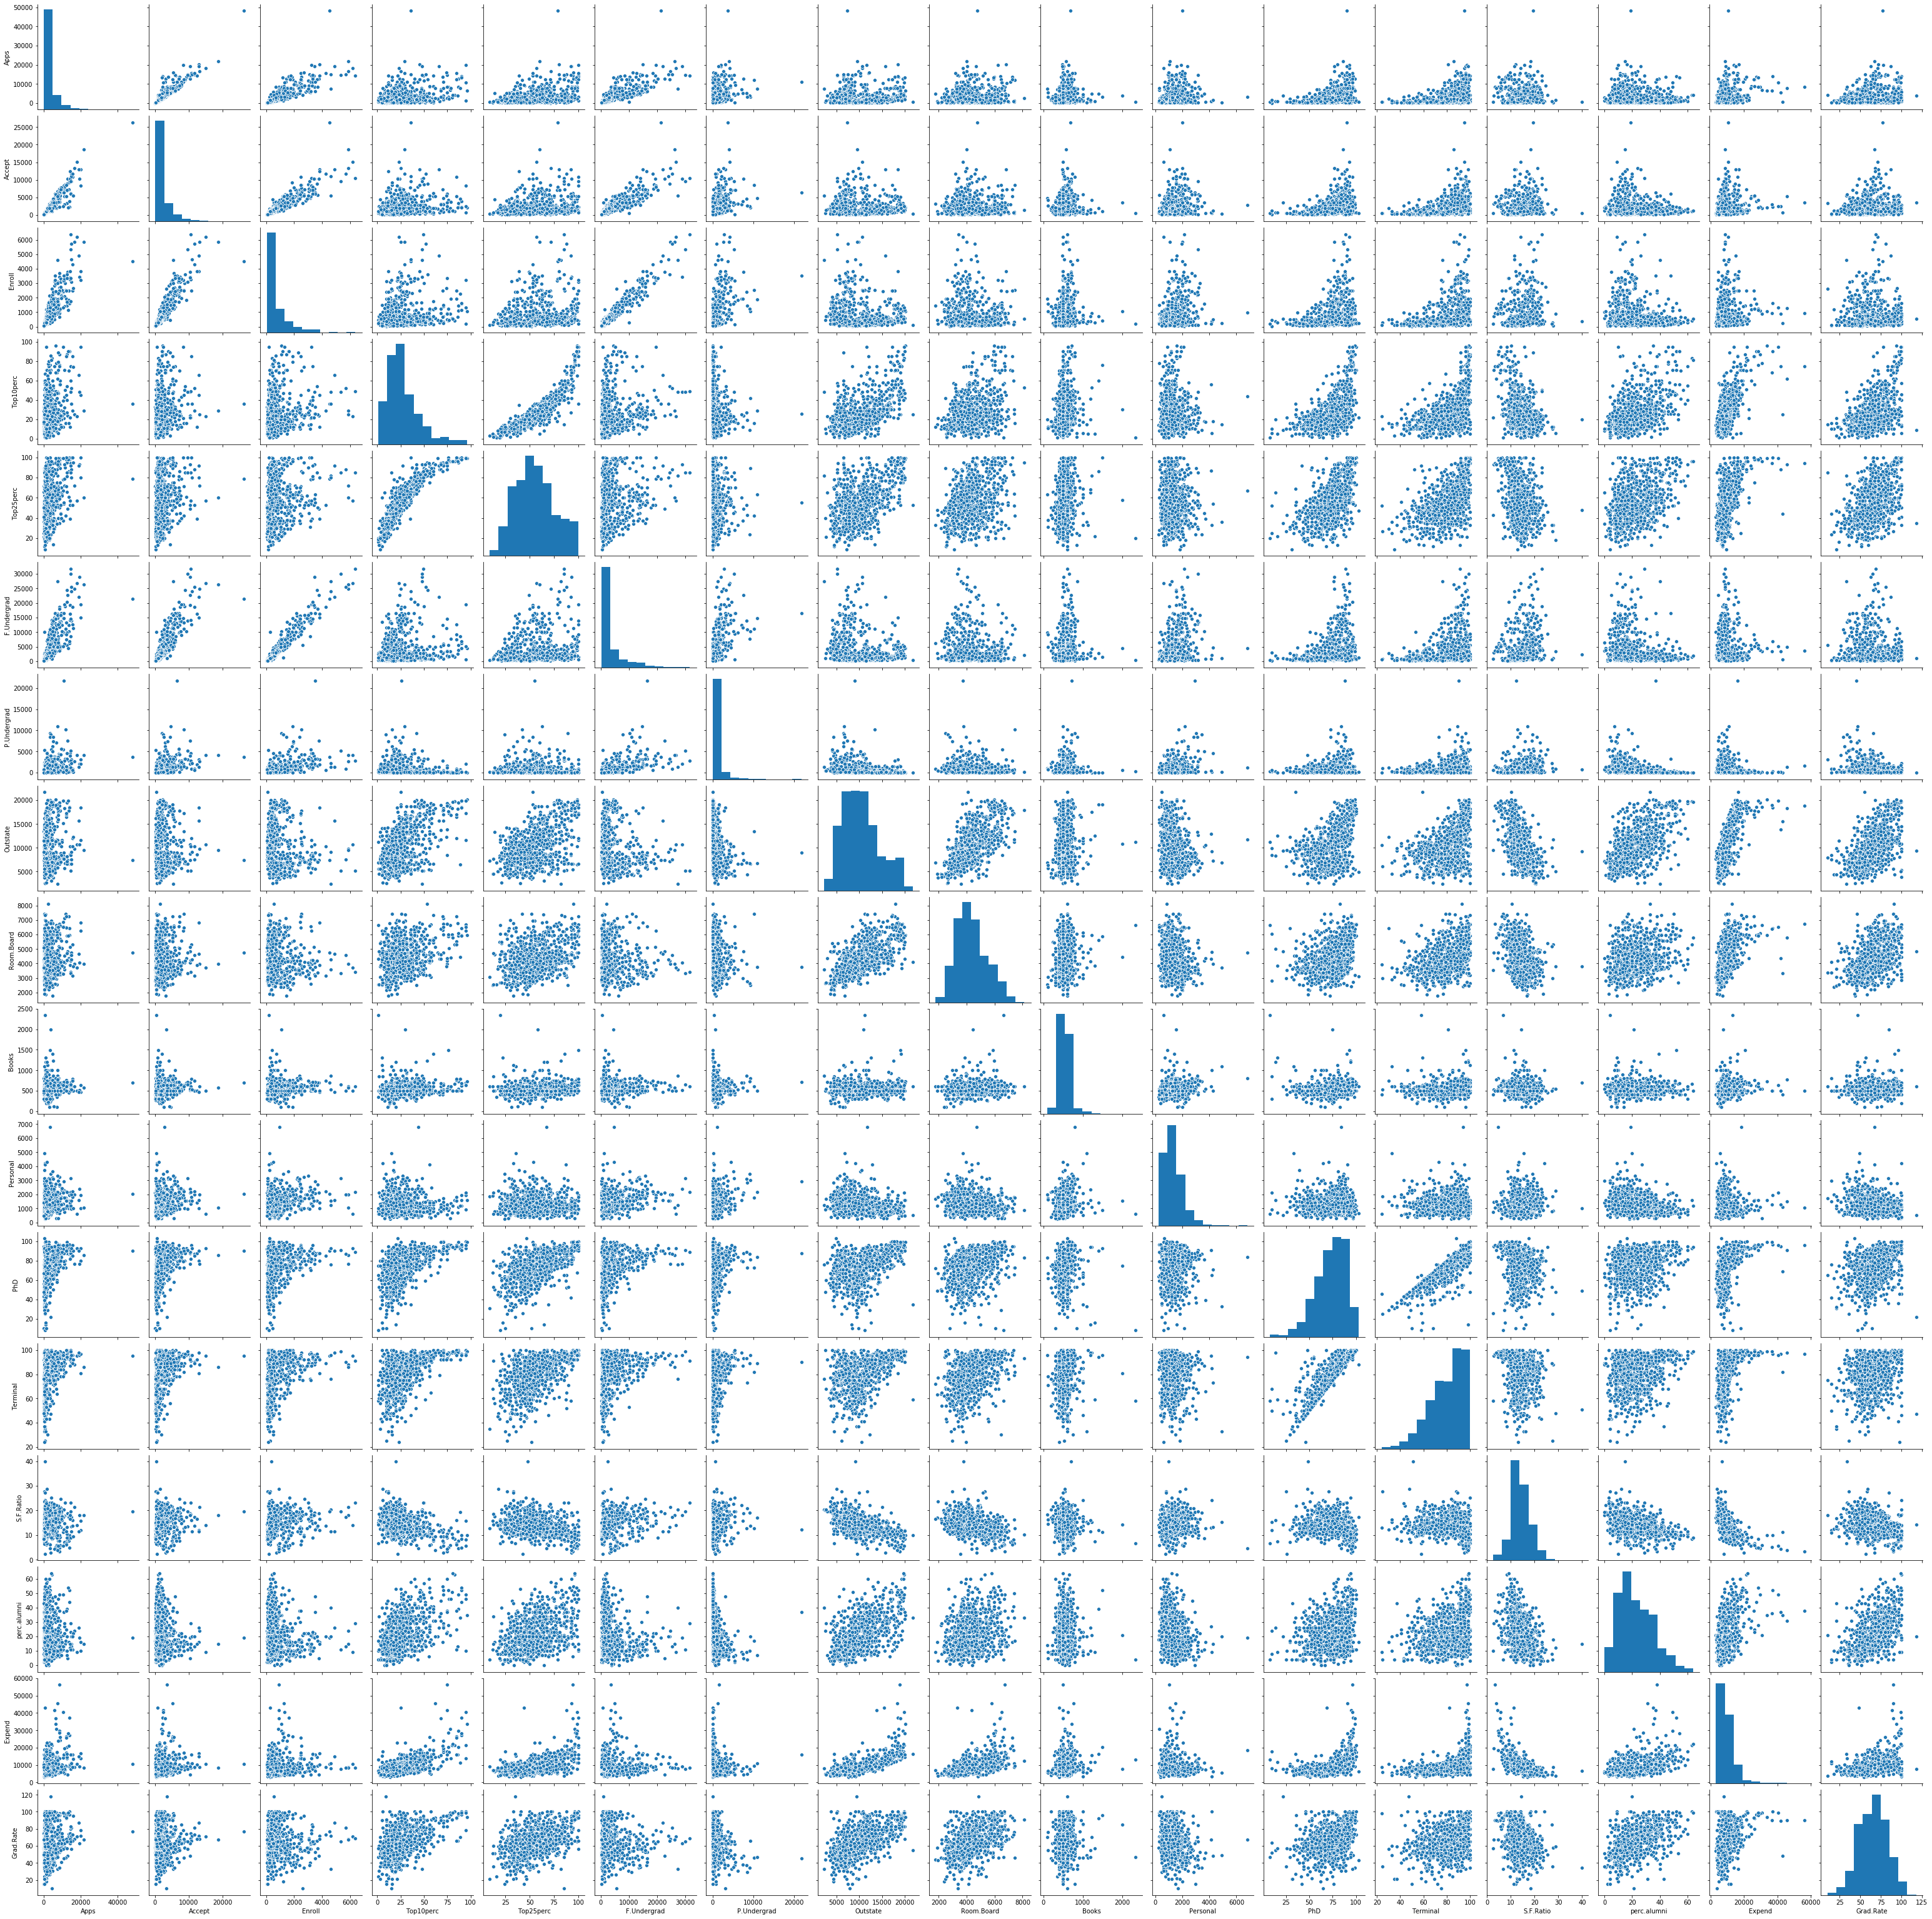

In [9]:
sns.pairplot(df.drop(['Name','Private'], axis=1))

## 5. เช็คค่า Correlation ของ Dataset


In [9]:
df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

## 6.ใช้ Correlation ทำ Heatmap


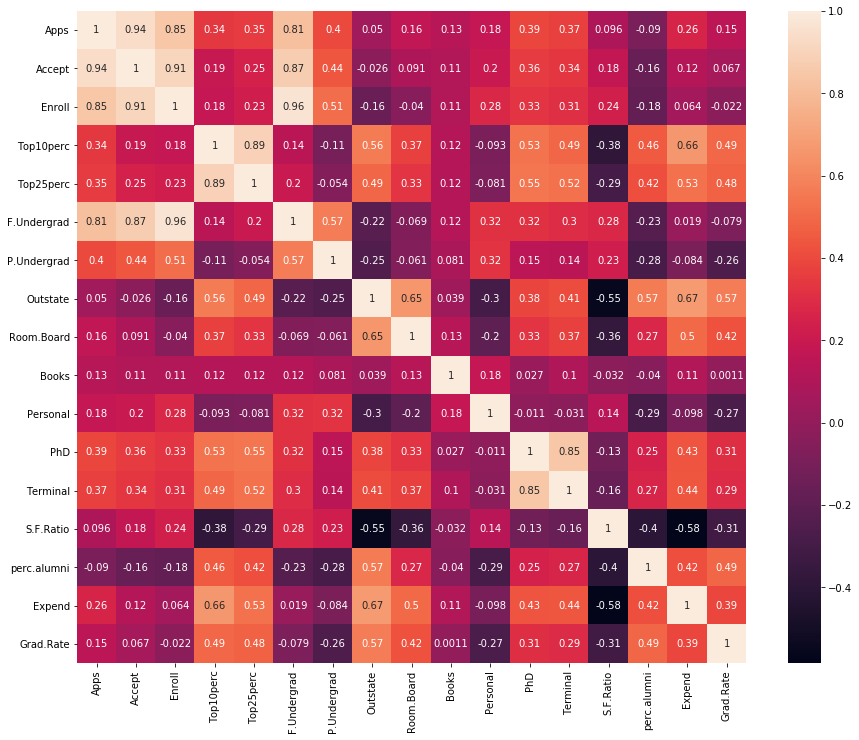

In [10]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

## 7. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด


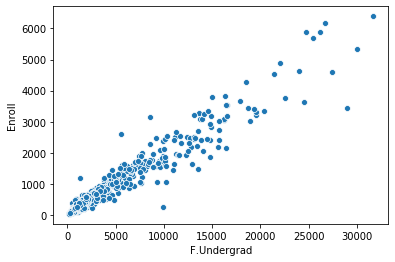

In [11]:
# most correlated pair : F.Undergrad & Enroll (0.96)
sns.scatterplot(data=df, x='F.Undergrad', y='Enroll')

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด


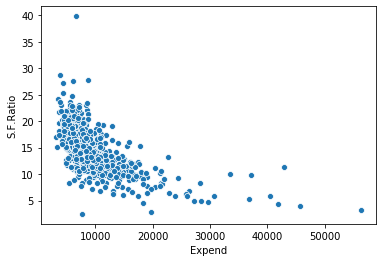

In [12]:
# most negative correlated pair : Expend & S.F.Ratio (-0.58)
sns.scatterplot(data=df, x='Expend', y='S.F.Ratio')

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ใกล้ 0 ที่สุด


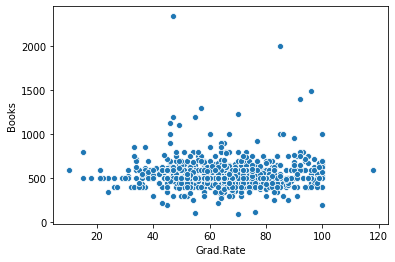

In [13]:
# least correlated pair : Grad.Rate & Books (0.0011)
sns.scatterplot(data=df, x='Grad.Rate', y='Books')

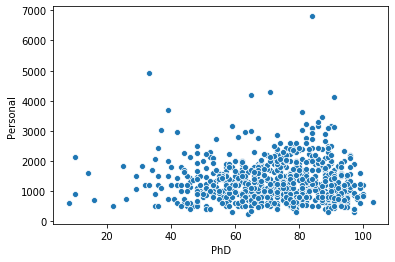

In [14]:
# least correlated pair : PhD & Personal (-0.0011)
sns.scatterplot(data=df, x='PhD', y='Personal')

## 10. ใช้ seaborn และ matplotlib สร้าง subplot 9 รูป (3x3) แต่ละรูปเป็น boxplot ของฟีเจอร์ใดก็ได้ที่ต้องการ


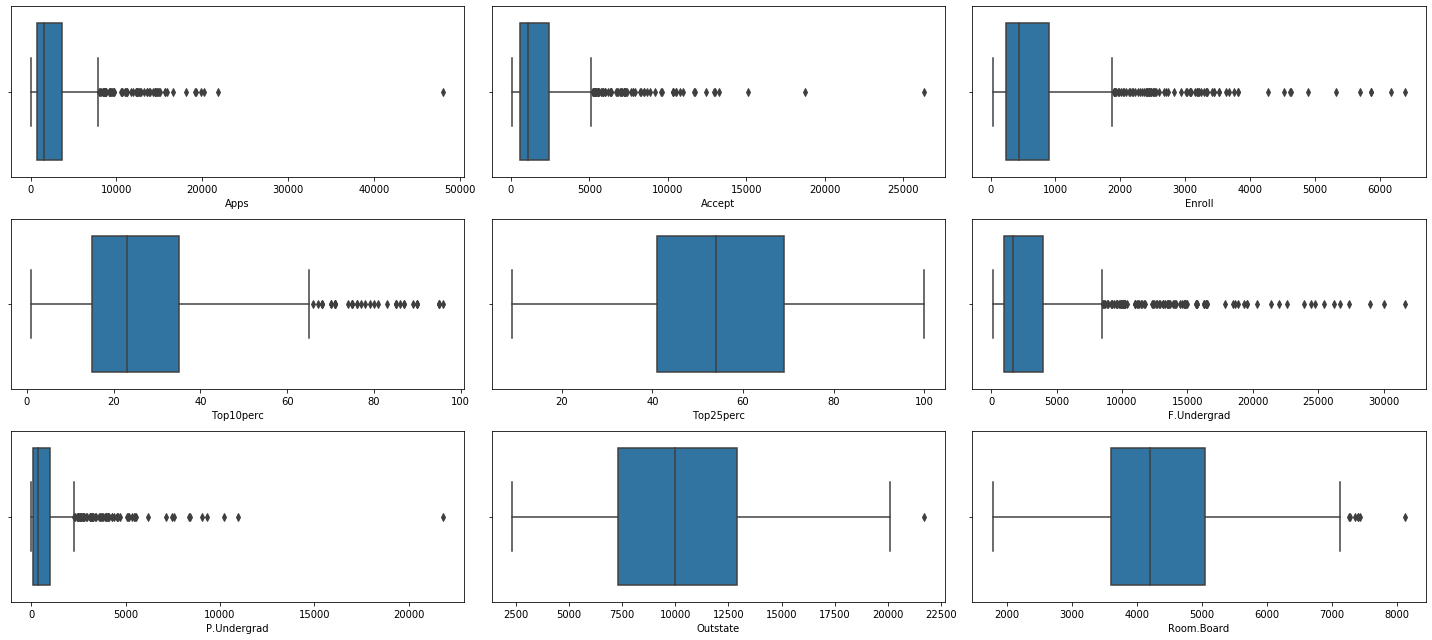

In [16]:
fig = plt.figure(figsize=(20,9))

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(df[df.columns.values[i+1]], orient='h')
fig.tight_layout()


## 11. ใช้ seaborn สร้าง countplot ของฟีเจอร์ Private ทั้งแบบแนวนอนและแนวตั้ง


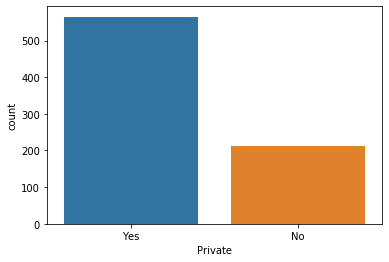

In [17]:
# แนวตั้ง
sns.countplot(x=df['Private'])

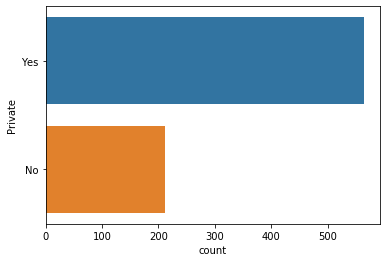

In [18]:
# แนวนอน
sns.countplot(y=df['Private'])

## 12. ใช้ seaborn สร้าง barplot ของฟีเจอร์ Grad Rate โดยแบ่งเป็นมหาวิทยาลัยรัฐกับเอกชน 


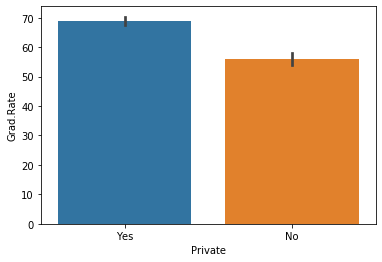

In [19]:
sns.barplot(y=df['Grad.Rate'],x=df['Private'])

## 13. ใช้ aggregate function groupby โดยหา Mean ของแต่ละฟีเจอร์โดยแบ่งเป็นมหาวิทยาลัยรัฐกับเอกชน 


In [15]:
df.groupby(['Private']).mean().reset_index()

Private         Apps       Accept       Enroll  Top10perc  Top25perc  \
0      No  5729.919811  3919.287736  1640.872642  22.834906  52.702830   
1     Yes  1977.929204  1305.702655   456.945133  29.330973  56.957522   

   F.Undergrad  P.Undergrad      Outstate   Room.Board       Books  \
0  8571.004717  1978.188679   6813.410377  3748.240566  554.377358   
1  1872.168142   433.966372  11801.693805  4586.143363  547.506195   

      Personal        PhD   Terminal  S.F.Ratio  perc.alumni        Expend  \
0  1676.981132  76.834906  82.816038  17.139151    14.358491   7458.316038   
1  1214.440708  71.093805  78.534513  12.945487    25.890265  10486.353982   

   Grad.Rate  
0  56.042453  
1  68.998230

## 14. ใช้ plotly สร้าง pie chart หายอดสมัครเข้ามหาวิทยาลัยทั้งหมดโดยแบ่งเป็นมหาวิทยาลัยรัฐกับเอกชน 


In [21]:
fig = px.pie(data_frame=df, names='Private', values='Apps', 
            title='Total Applications Received')
fig.show()

## 15. หาอัตราส่วนจำนวนมหาวิทยาลัยรัฐต่อเอกชน


In [22]:
# จำนวนมหาวิทยาลัยรัฐ
(df['Private']=='No').sum(0)

212

In [23]:
# จำนวนมหาวิทยาลัยเอกชน
(df['Private']=='Yes').sum(0)

565

In [24]:
# อัตราส่วนมหาวิทยาลัยรัฐต่อเอกชน
public_private_ratio = (df['Private']=='No').sum(0) / (df['Private']=='Yes').sum(0)

In [25]:
print('Public : Private \n= ', (df['Private']=='No').sum(0),' : ', (df['Private']=='Yes').sum(0))
print('= ', public_private_ratio)

Public : Private 
=  212  :  565
=  0.3752212389380531


## 16. ใช้ plotly สร้าง boxplot โดยใช้ฟีเจอร์ Books โดยแบ่งเป็นมหาวิทยาลัยรัฐกับเอกชน และให้มี scatterplot อยู่ข้างๆแต่ละกล่องด้วย (เป็น parameter ของ plotly)


In [26]:
fig = px.box(data_frame=df, x='Private',y='Books', points='all', height=700, width=700,
            title='Number of Books in Private and Public Universities')
fig.show()

Note : ค่าเฉลี่ยราคาหนังสือของมหาวิทยาลัยรัฐบาลและเอกชนไม่แตกต่างกันมากนัก

## 17. ใช้ plotly สร้าง Correlation HeatMap


In [27]:
fig = px.imshow(df.corr(), )
fig.show()

## 18. Drop Outliers ในฟีเจอร์ Apps (การทำ Clustering ควรจะจัดการ Outliers ก่อนทุกครั้ง)


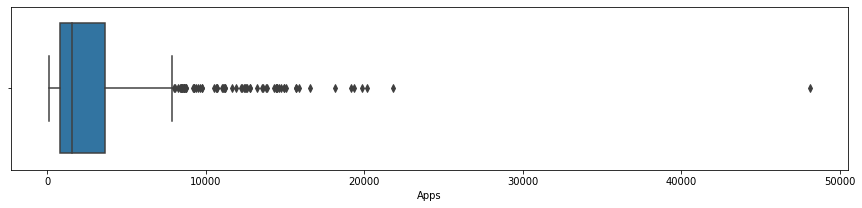

In [28]:
fig = plt.figure(figsize=(15,3))
sns.boxplot(df['Apps'], orient='h')

In [16]:
# calculate Q1, Q3, IQR, upper_fence
Q1 = df['Apps'].describe()[4]
Q3 = df['Apps'].describe()[6]
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
print('upper_fence = ', upper_fence)

upper_fence =  7896.0


In [17]:
df['Apps'] = [upper_fence if (x > upper_fence) else x for x in df['Apps']]

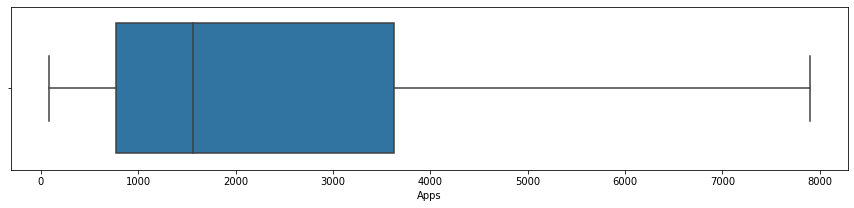

In [18]:
# plot again to check outliers
fig = plt.figure(figsize=(15,3))
sns.boxplot(df['Apps'], orient='h')

## 19. ทำ Min-Max Normalization ให้กับทุกฟีเจอร์ใน DataFrame


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# เลือกเฉพาะ numerical data สร้างเป็น dataframe ใหม่
df1 = df.drop(['Name','Private'], axis=1).copy()
df1

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0    1660.0    1232     721         23         52         2885          537   
1    2186.0    1924     512         16         29         2683         1227   
2    1428.0    1097     336         22         50         1036           99   
3     417.0     349     137         60         89          510           63   
4     193.0     146      55         16         44          249          869   
..      ...     ...     ...        ...        ...          ...          ...   
772  2197.0    1515     543          4         26         3089         2029   
773  1959.0    1805     695         24         47         2849         1107   
774  2097.0    1915     695         34         61         2793          166   
775  7896.0    2453    1317         95         99         5217           83   
776  2989.0    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0        7440        3300    450      2200   70        78       18.1   
1       12280        6450    750      1500   29        30       12.2   
2       11250        3750    400      1165   53        66       12.9   
3       12960        5450    450       875   92        97        7.7   
4        7560        4120    800      1500   76        72       11.9   
..        ...         ...    ...       ...  ...       ...        ...   
772      6797        3900    500      1200   60        60       21.0   
773     11520        4960    600      1250   73        75       13.3   
774      6900        4200    617       781   67        75       14.4   
775     19840        6510    630      2115   96        96        5.8   
776      4990        3560    500      1250   75        75       18.1   

     perc.alumni  Expend  Grad.Rate  
0             12    7041         60  
1             16   10527         56  
2             30    8735         54  
3             37   19016         59  
4              2   10922         15  
..           ...     ...        ...  
772           14    4469         40  
773           31    9189         83  
774           20    8323         49  
775           49   40386         99  
776           28    4509         99  

[777 rows x 17 columns]

In [21]:
# feature scaling บน dataframe df1        
sc_X = MinMaxScaler()
df1_sc = sc_X.fit_transform(df1)
df1_sc

array([[0.20204734, 0.04417701, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.26935381, 0.07053089, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.17236084, 0.03903572, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.25796545, 0.07018813, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [1.        , 0.09067713, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.37210493, 0.06790312, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

In [22]:
# convert back to dataframe
df1_sc = pd.DataFrame(df1_sc, columns=df1.columns)
df1_sc

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0    0.202047  0.044177  0.107913   0.231579   0.472527     0.087164   
1    0.269354  0.070531  0.075035   0.157895   0.219780     0.080752   
2    0.172361  0.039036  0.047349   0.221053   0.450549     0.028473   
3    0.042994  0.010549  0.016045   0.621053   0.879121     0.011776   
4    0.014331  0.002818  0.003146   0.157895   0.384615     0.003492   
..        ...       ...       ...        ...        ...          ...   
772  0.270761  0.054955  0.079912   0.031579   0.186813     0.093639   
773  0.240307  0.065999  0.103823   0.242105   0.417582     0.086021   
774  0.257965  0.070188  0.103823   0.347368   0.571429     0.084243   
775  1.000000  0.090677  0.201667   0.989474   0.989011     0.161186   
776  0.372105  0.067903  0.103193   0.284211   0.593407     0.090433   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0       0.024548  0.263430    0.239596  0.157754  0.297710  0.652632   
1       0.056148  0.513430    0.736129  0.291444  0.190840  0.221053   
2       0.004488  0.460227    0.310530  0.135472  0.139695  0.473684   
3       0.002839  0.548554    0.578499  0.157754  0.095420  0.884211   
4       0.039753  0.269628    0.368852  0.313725  0.190840  0.715789   
..           ...       ...         ...       ...       ...       ...   
772     0.092878  0.230217    0.334174  0.180036  0.145038  0.547368   
773     0.050653  0.474174    0.501261  0.224599  0.152672  0.684211   
774     0.007557  0.235537    0.381463  0.232175  0.081069  0.621053   
775     0.003755  0.903926    0.745586  0.237968  0.284733  0.926316   
776     0.079002  0.136880    0.280580  0.180036  0.152672  0.705263   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0    0.710526   0.418231     0.187500  0.072671   0.462963  
1    0.078947   0.260054     0.250000  0.138387   0.425926  
2    0.552632   0.278820     0.468750  0.104605   0.407407  
3    0.960526   0.139410     0.578125  0.298415   0.453704  
4    0.631579   0.252011     0.031250  0.145833   0.046296  
..        ...        ...          ...       ...        ...  
772  0.473684   0.495979     0.218750  0.024186   0.277778  
773  0.671053   0.289544     0.484375  0.113164   0.675926  
774  0.671053   0.319035     0.312500  0.096839   0.361111  
775  0.947368   0.088472     0.765625  0.701265   0.824074  
776  0.671053   0.418231     0.437500  0.024940   0.824074  

[777 rows x 17 columns]

## 20. เลือกฟีเจอร์ Apps, Accept สร้าง 2-Means


In [23]:
X = df1_sc[['Apps','Accept']].values
X

array([[0.20204734, 0.04417701],
       [0.26935381, 0.07053089],
       [0.17236084, 0.03903572],
       ...,
       [0.25796545, 0.07018813],
       [1.        , 0.09067713],
       [0.37210493, 0.06790312]])

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=2, random_state=200)
cluster_kmeans1 = kmeans.fit_predict(X)

In [26]:
cluster_kmeans1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## 21. หาค่า Cluster Centers, Inertia, n_iter


In [41]:
# centroid coordinates
kmeans.cluster_centers_

array([[0.16662669, 0.0365719 ],
       [0.82291747, 0.19874684]])

In [42]:
# inertia
kmeans.inertia_

18.10129799978165

In [43]:
# number of iteration
kmeans.n_iter_

2

## 22. สร้าง Clustering Visualization และจุด Centroids


Text(0, 0.5, 'number of applications accepted')

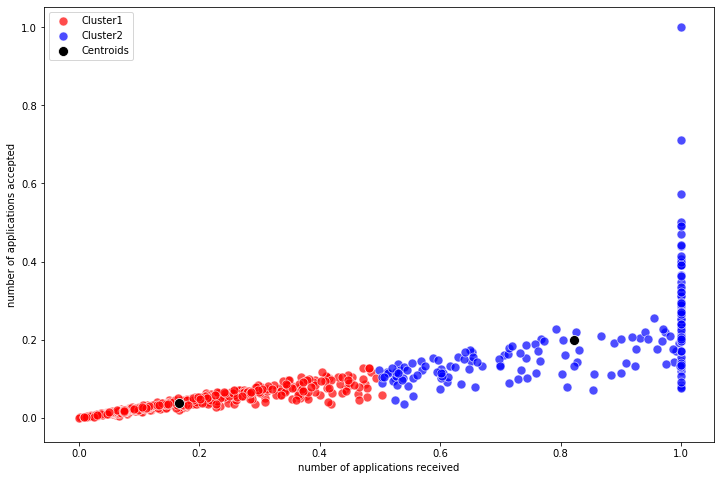

In [27]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=X[cluster_kmeans1==0][:,0], y=X[cluster_kmeans1==0][:,1], color='r', label='Cluster1', s=80, alpha=0.7)
sns.scatterplot(x=X[cluster_kmeans1==1][:,0], y=X[cluster_kmeans1==1][:,1], color='b', label='Cluster2', s=80, alpha=0.7)
# plot centroids
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='black', label='Centroids', s=100)
plt.xlabel('number of applications received')
plt.ylabel('number of applications accepted')

## 23. สร้าง Elbow Method Visualization เพื่อหาค่า K ที่เหมาะสมที่สุด


In [119]:
# Elbow Method
WCSS = []
for k in range (1, 20):
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

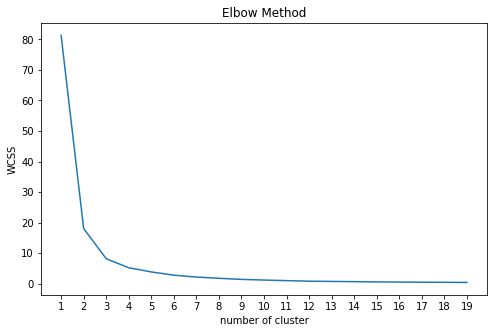

In [120]:
k = [k for k in range(1,20)]

fig = plt.figure(figsize=(8,5))
sns.lineplot(x=k, y=WCSS)
plt.ylabel('WCSS')
plt.xlabel('number of cluster')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.title('Elbow Method')
plt.show()

Note : เลือก k=3

## 24. ใช้ฟีเจอร์เดิมสร้าง K-Means ด้วยค่า K จากข้อ 23 


In [29]:
kmeans = KMeans(n_clusters=3, random_state=200)
cluster_kmeans2 = kmeans.fit_predict(X)

In [30]:
cluster_kmeans2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,

## 25. หาค่า Cluster Centers, Inertia, n_iter ด้วยค่า K จากข้อ 23 


In [49]:
# centroid coordinates
kmeans.cluster_centers_

array([[0.1184647 , 0.02722264],
       [0.93112425, 0.23520451],
       [0.43972519, 0.08947341]])

In [50]:
# inertia
kmeans.inertia_

8.210612121891662

In [51]:
# number of iteration
kmeans.n_iter_

4

## 26. สร้าง Clustering Visualization และจุด Centroids ด้วยค่า K จากข้อ 23 


Text(0, 0.5, 'number of applications accepted')

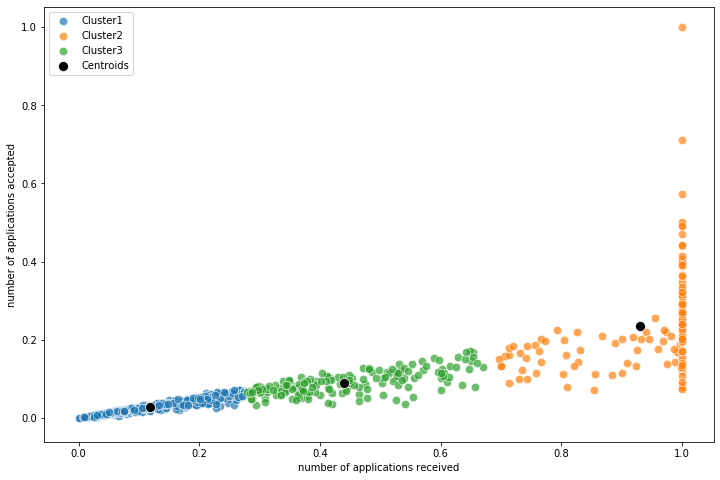

In [31]:
k = 3

fig = plt.figure(figsize=(12,8))
for i in range(k):
    # plot clusters
    sns.scatterplot(x=X[cluster_kmeans2==i][:,0], y=X[cluster_kmeans2==i][:,1], 
                    label='Cluster'+str(i+1), s=70, alpha=0.7)
# plot centroids
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], 
                label='Centroids', color='black', s=100)
plt.xlabel('number of applications received')
plt.ylabel('number of applications accepted')

## 27. เลือกฟีเจอร์ Top25perc, Outstate (เพราะค่า Correlation ใกล้ 0)  สร้าง 2-Means


In [32]:
X = df1_sc[['Top25perc','Outstate']].values

In [122]:
X

array([[0.47252747, 0.26342975],
       [0.21978022, 0.51342975],
       [0.45054945, 0.46022727],
       ...,
       [0.57142857, 0.23553719],
       [0.98901099, 0.90392562],
       [0.59340659, 0.13688017]])

In [35]:
kmeans = KMeans(n_clusters=2, random_state=200)
cluster_kmeans3 = kmeans.fit_predict(X)

In [36]:
cluster_kmeans3

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

## 28. หาค่า Cluster Centers, Inertia, n_iter


In [77]:
# centroid coordinates
kmeans.cluster_centers_

array([[0.39462363, 0.30982055],
       [0.72190837, 0.60694768]])

In [78]:
# inertia
kmeans.inertia_

35.05348524905865

In [79]:
# number of iteration
kmeans.n_iter_

5

## 29. สร้าง Clustering Visualization และจุด Centroids


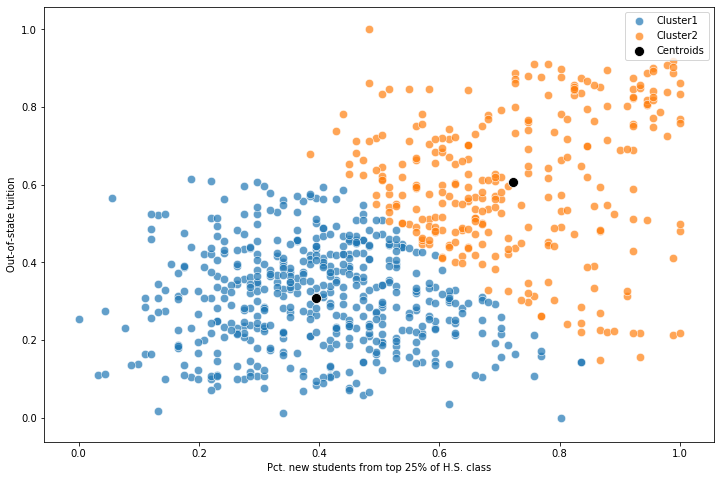

In [37]:
k = 2

fig = plt.figure(figsize=(12,8))
for i in range(k):
    # plot clusters
    sns.scatterplot(x=X[cluster_kmeans3==i][:,0], y=X[cluster_kmeans3==i][:,1], 
                    label='Cluster'+str(i+1), s=70, alpha=0.7)
# plot centroids
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], 
                label='Centroids', color='black', s=100)
plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.show()

## 30. สร้าง Elbow Method Visualization เพื่อหาค่า K ที่เหมาะสมที่สุด


In [123]:
# Elbow Method

WCSS = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [124]:
WCSS

[70.26368042899324,
 35.05348524905865,
 24.753759357458947,
 18.642258720320736,
 14.892615518631017,
 12.001873581614209,
 10.35144738539297,
 8.946508991164391,
 8.102804654426002,
 7.265370424284248,
 6.6805127157041,
 6.123506793717032,
 5.678916133593802,
 5.3580809316691855,
 4.911646811255876,
 4.695559364465188,
 4.393491123084781,
 4.111020793567402,
 3.8596459981863642]

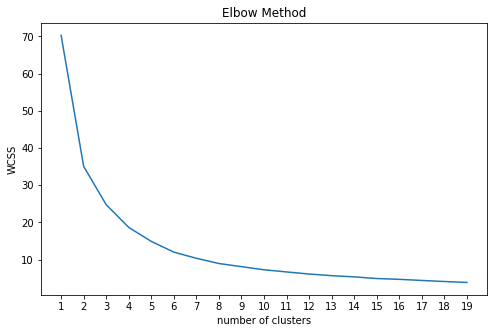

In [125]:
k = [x for x in range(1,20)]
fig = plt.figure(figsize=(8,5))
sns.lineplot(x=k, y=WCSS)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(k)
plt.show()

Note : เลือก k=3

## 31. ใช้ฟีเจอร์เดิมสร้าง K-Means ด้วยค่า K จากข้อ 30 


In [38]:
kmeans = KMeans(n_clusters=3, random_state=200)
cluster_kmeans4 = kmeans.fit_predict(X)

In [39]:
cluster_kmeans4

array([0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0,
       1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2,
       2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1,
       0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0,
       1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2,

## 32. หาค่า Cluster Centers, Inertia, n_iter ด้วยค่า K จากข้อ 30


In [94]:
# centroid coordinates
kmeans.cluster_centers_

array([[0.59855386, 0.33577894],
       [0.73580823, 0.70078416],
       [0.30650619, 0.31599616]])

In [95]:
# inertia
kmeans.inertia_

24.753759357458947

In [96]:
# number of iteration
kmeans.n_iter_

9

## 33. สร้าง Clustering Visualization และจุด Centroids ด้วยค่า K จากข้อ 30


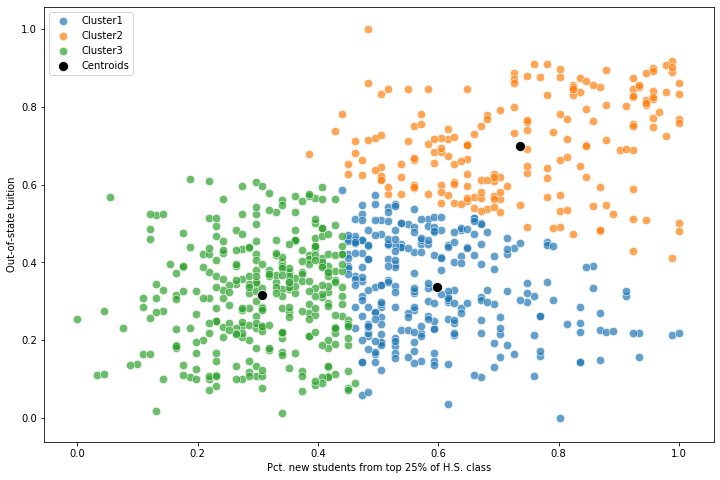

In [40]:
k = 3

fig = plt.figure(figsize=(12,8))
for i in range(k):
    # plot clusters
    sns.scatterplot(x=X[cluster_kmeans4==i][:,0], y=X[cluster_kmeans4==i][:,1], 
                    label='Cluster'+str(i+1), s=70, alpha=0.7)
# plot centroids
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], 
                label='Centroids', color='black', s=100)
plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.show()

## 34. เลือกฟีเจอร์ Apps, Accept สร้าง Hierarchical Clustering


In [41]:
X = df1_sc[['Apps','Accept']].values

In [99]:
X

array([[0.20204734, 0.04417701],
       [0.26935381, 0.07053089],
       [0.17236084, 0.03903572],
       ...,
       [0.25796545, 0.07018813],
       [1.        , 0.09067713],
       [0.37210493, 0.06790312]])

## 35. ใช้ scipy สร้าง Dendrogram ให้ method = ‘ward’


In [100]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'euclidean distance')

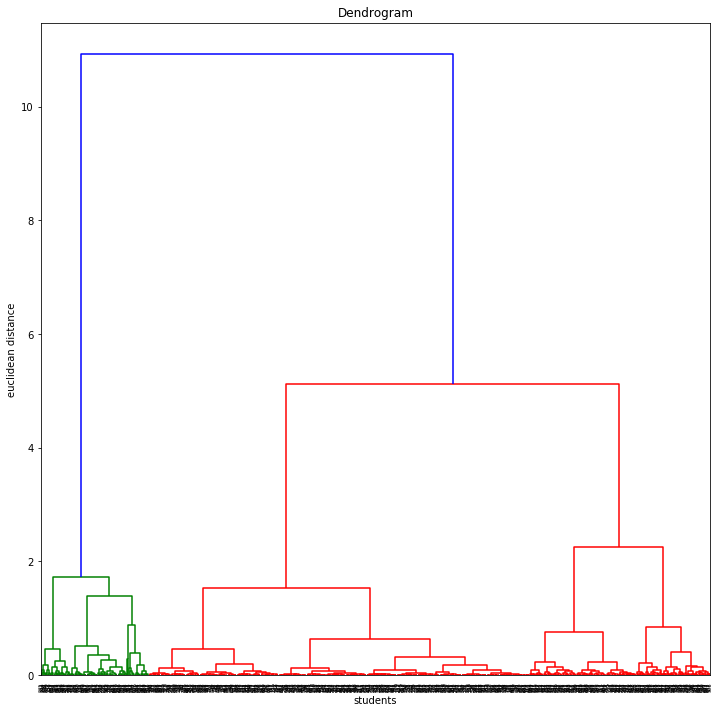

In [105]:
fig = plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('students')
plt.ylabel('euclidean distance')

Note : k=2

## 36. สร้าง AgglomerativeClustering จากจำนวน Cluster ที่เหมาะสมที่สุดใน Dendrogram


In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
cls = AgglomerativeClustering(n_clusters=2)
cluster_hierarchy1 = cls.fit_predict(X)

In [44]:
cluster_hierarchy1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 37. สร้าง Clustering Visualization ของ Hierarchical Clustering


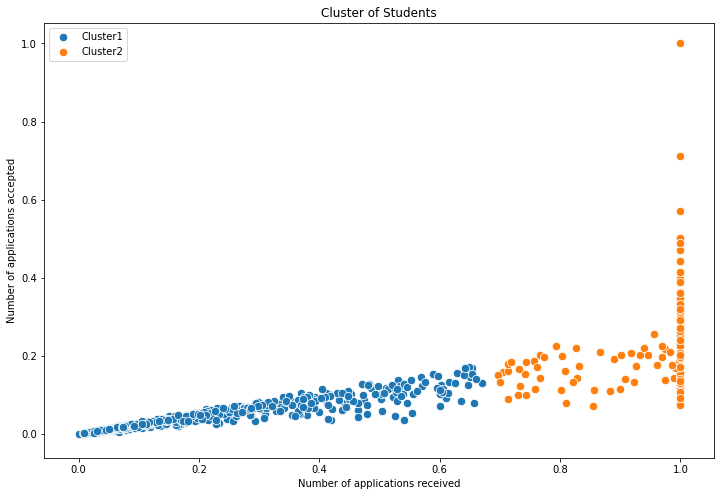

In [45]:
fig = plt.figure(figsize=(12,8))

# plot clusters
for i in range(2):
    sns.scatterplot(X[cluster_hierarchy1==i][:,0], X[cluster_hierarchy1==i][:,1], label='Cluster'+str(i+1), s=70)

plt.xlabel('Number of applications received')
plt.ylabel('Number of applications accepted')
plt.title('Cluster of Students')
plt.show()

## 38. เลือกฟีเจอร์ Top25perc, Outstate สร้าง Hierarchical Clustering


In [46]:
X = df1_sc[['Top25perc','Outstate']].values

## 39. ใช้ scipy สร้าง Dendrogram ให้ method = ‘ward’


Text(0, 0.5, 'euclidean distance')

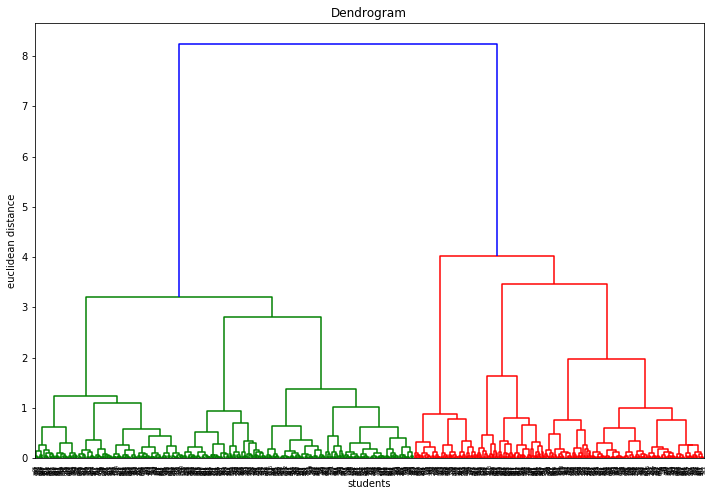

In [113]:
fig = plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('students')
plt.ylabel('euclidean distance')

Note : k = 2

## 40. สร้าง AgglomerativeClustering จากจำนวน Cluster ที่เหมาะสมที่สุดใน Dendrogram


In [47]:
cls = AgglomerativeClustering(n_clusters=2)
cluster_hierarchy2 = cls.fit_predict(X)

In [48]:
cluster_hierarchy2

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

## 41. สร้าง Clustering Visualization ของ Hierarchical Clustering


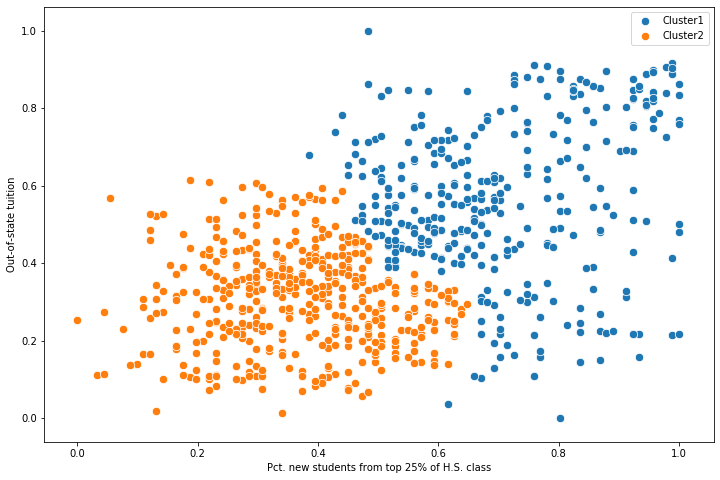

In [49]:
fig = plt.figure(figsize=(12,8))

# plot clusters
for i in range(2):
    sns.scatterplot(X[cluster_hierarchy2==i][:,0], X[cluster_hierarchy2==i][:,1], label='Cluster'+str(i+1), s=70)

plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.show()

## 42. เปรียบเทียบจำนวน Clusters ของ K-Means และ Hierarchical Clustering พร้อมบอกเหตุผลว่าคิดว่า Algorithm ใดเหมาะสมมากกว่าสำหรับฟีเจอร์ทั้งสองชุด


Note :  
* K-Means Clustering : จำนวน clusters ที่ได้จาก Elbow method ของ features ทั้งสองชุด เท่ากับ 3
* Hierarchical Clustering : จำนวน clusters ที่ได้จาก Dendrogram ของ features ทั้งสองชุด เท่ากับ 2  
คิดว่า จำนวน clusters ของ Dendrogram น่าจะเหมาะสมกว่า เพราะขณะทำ K-Means Clustering ผู้ทำเลือกค่า k ที่มากกว่ากว่า 2 ด้วยตนเอง แต่หากพิจารณาจาก Elblow method ค่า k=2 คือค่าที่เหมาะสมที่สุด

## 43. จากข้อ 38 ทำ Hierarchical Clustering โดยเลือกใช้จำนวน Clusters เท่ากับ K-Means และเปรียบเทียบผลลัพธ์


In [51]:
# เลือก X
X = df1_sc[['Apps','Accept']].values
# clustering
cls = AgglomerativeClustering(n_clusters=3)
cluster_hierarchy3 = cls.fit_predict(X)

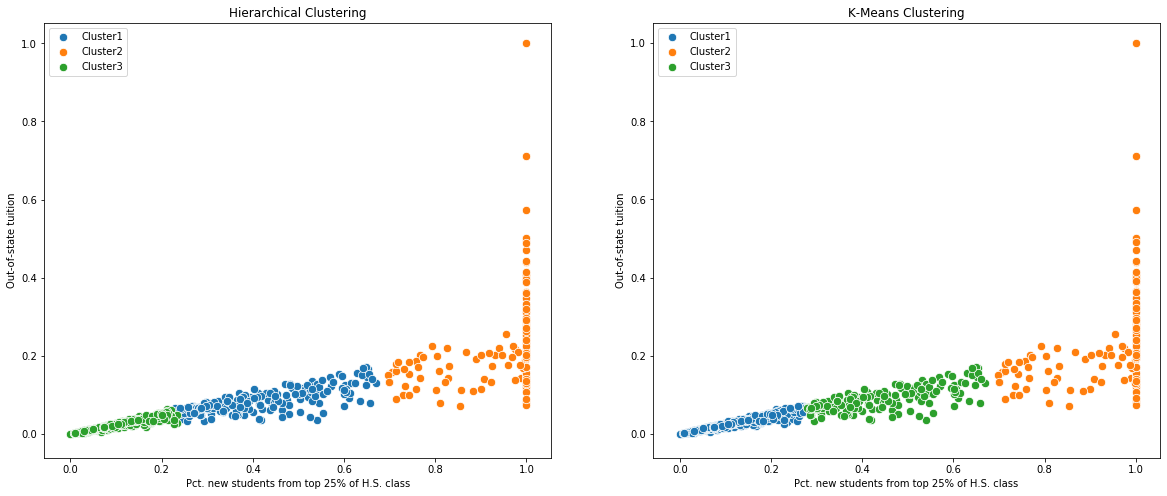

In [55]:
fig = plt.figure(figsize=(20,8))

# plot hierarchical clustering
plt.subplot(1,2,1)
for i in range(3):
    sns.scatterplot(X[cluster_hierarchy3==i][:,0], X[cluster_hierarchy3==i][:,1], label='Cluster'+str(i+1), s=70)
plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.title('Hierarchical Clustering')

# plot K-Means clustering
plt.subplot(1,2,2)
for i in range(3):
    sns.scatterplot(X[cluster_kmeans2==i][:,0], X[cluster_kmeans2==i][:,1], label='Cluster'+str(i+1), s=70)
plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.title('K-Means Clustering')

plt.show()

Note :  
สำหรับ feature 'Apps' และ 'Accept' จะเห็นว่า clustering จากทั้งสองโมเดลไม่แตกต่างกันมากนัก

In [58]:
# เลือก X
X = df1_sc[['Top25perc','Outstate']].values
# clustering
cls = AgglomerativeClustering(n_clusters=3)
cluster_hierarchy4 = cls.fit_predict(X)

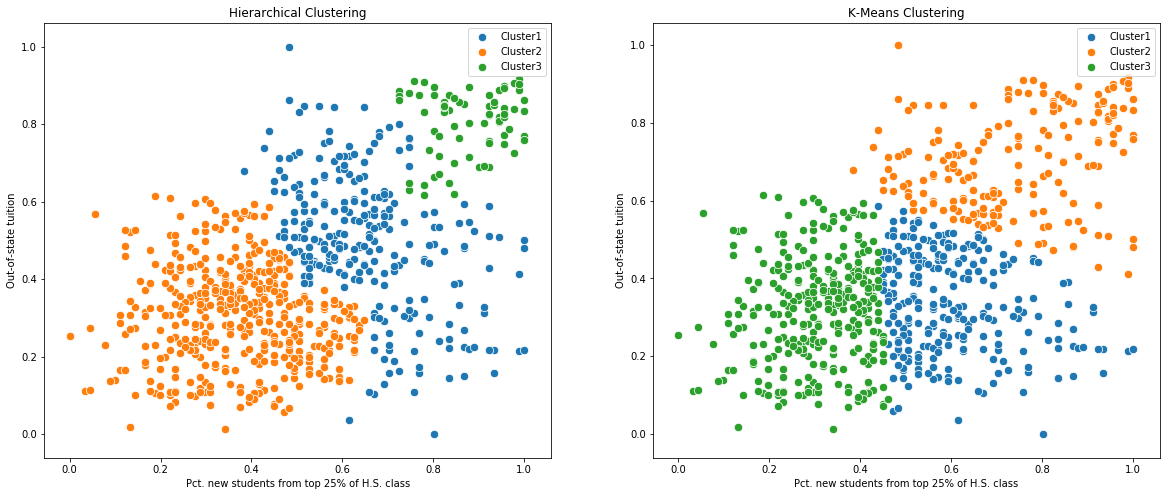

In [59]:
fig = plt.figure(figsize=(20,8))

# plot hierarchical clustering
plt.subplot(1,2,1)
for i in range(3):
    sns.scatterplot(X[cluster_hierarchy4==i][:,0], X[cluster_hierarchy4==i][:,1], label='Cluster'+str(i+1), s=70)
plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.title('Hierarchical Clustering')

# plot K-Means clustering
plt.subplot(1,2,2)
for i in range(3):
    sns.scatterplot(X[cluster_kmeans4==i][:,0], X[cluster_kmeans4==i][:,1], label='Cluster'+str(i+1), s=70)
plt.xlabel('Pct. new students from top 25% of H.S. class')
plt.ylabel('Out-of-state tuition')
plt.title('K-Means Clustering')

plt.show()

Note :  
สำหรับ feature 'Top25perc' และ 'Outstate' จะเห็นว่า clustering จากทั้งสองโมเดลมีความแตกต่างกัน